# 데이터 전처리 진행

In [1]:
#!pip install python-mecab-ko pyLDAvis

In [2]:
import numpy as np
import pandas as pd
import warnings # 경고 메시지 무시

In [3]:
df = pd.read_csv('../datasets/oliveyoung_wemake_data.csv')
df[:2]

,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating
0,0,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",보리오빠,없으면 안될 최고의 diet템! 피치번을 추천합니당 ㅎㅎ 사진엔 없지만 4통째 먹고...,2023.08.27,5점만점에 5점
1,1,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",바보바니,알약 통통이하트 넘예뻐요. 자기전 먹고 효과있으면 얼마나 좋을까요 ㅜㅜ 나이들수록 ...,2023.09.14,5점만점에 5점


### 결측치 처리 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4589 entries, 0 to 4588
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4589 non-null   int64 
 1   product_name    4589 non-null   object
 2   review_name     4570 non-null   object
 3   review_content  3900 non-null   object
 4   review_date     4463 non-null   object
 5   review_rating   4423 non-null   object
dtypes: int64(1), object(5)
memory usage: 215.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0          0
product_name        0
review_name        19
review_content    689
review_date       126
review_rating     166
dtype: int64

In [6]:
df_dropna = df.dropna()

In [7]:
df_dropna.isnull().sum()

Unnamed: 0        0
product_name      0
review_name       0
review_content    0
review_date       0
review_rating     0
dtype: int64

In [8]:
df_dropna[3:]

,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating
3,3,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",히드돈이,먹으면 달달한 사탕맛이 나는데\n2-3초 빨아 먹으면 달달구리는 다 녹아서 맛없는 ...,2023.09.04,5점만점에 5점
4,4,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",짱구덕휴,효과는 모르겠지만 덜찌는것 같아요\n알약이 이쁘고 입안에 들어갔을때 역하지않아서 좋습니다,2023.09.04,5점만점에 5점
5,5,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",하늘색벽지,효과가 가장 있는 제품인 것 같아요!\n너무 좋습니다!\n세일기간만 기다리고 있습니...,2023.08.25,5점만점에 5점
6,6,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",IMIN,연달아서 먹어야 효과를 알텐데 약 때문에 꾸준히 못먹어봐서 잘 모르겠어요 그래도 혹...,2023.08.25,5점만점에 5점
7,7,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",수아짱,식단만으로 부족해서 도움받으려고 구매했어요 자기 전 한알 신기하네요,2023.09.10,5점만점에 4점
...,...,...,...,...,...,...
4583,1367,[4+1] 락토페린 산양유 초유 단백질 분말 스틱 (2g x 30포) / 네덜란드산...,oke*******,친정엄마께 드릴려고 삽니다.산양유 드셔보고싶어하셔서 좋은기회인것같아요,2023.01.03,5.0
4584,1368,[4+1] 락토페린 산양유 초유 단백질 분말 스틱 (2g x 30포) / 네덜란드산...,whg******,산양유 단백질 광고보고 어떤지 구매해봤어요. 많이 달지도 않고 먹기 편하고 좋네요.^^,2022.12.14,4.0
4585,1369,[4+1] 락토페린 산양유 초유 단백질 분말 스틱 (2g x 30포) / 네덜란드산...,app*****,꾸준히 먹고는있는데 어디가 좋아지는건지..맛있어서 매일 챙겨먹고는 있어요,2023.01.31,4.0
4586,1370,테이크핏 맥스 바나나맛 250ml X 24입,jih******,뭔가 끈적거려서 보니 제품 하나가 찢어져 있었어요.,2023.09.20,3.0


## 자연어 전처리 

### 형태소 분석

In [9]:
from konlpy.tag import Okt
okt = Okt()

In [10]:
content = list(df_dropna['review_content']) 

In [11]:
sentence = ' '.join(content) # 한줄로 만들기 

In [12]:
word_tokens = okt.morphs(sentence)

In [13]:
word_pos = okt.pos(sentence)

### 불필요한 심볼 없애기 

In [14]:
# 쉼표, 엔터 등등의 값 대체 
# filtered_content = df_dropna['review_content'].replace('.', '').replace(',','').replace("'","").replace('·', ' ').replace('=','').replace('\n','').replace('\\n',' ').replace('\\n\\n','  ')
# list(filtered_content)

### 불용어 처리 

In [26]:
stop_words = pd.read_csv('../datasets/stopword_list.txt', header=None, encoding ='utf-8')
#stop_words = stop_words[0]
stop_words= stop_words[0].values

In [27]:
one_char_keyword = pd.read_csv('../datasets/one_char_list.txt', header=None, encoding ='utf-8')
one_char_keyword = one_char_keyword[0].values

In [28]:
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()

In [29]:
# 토크나이징 함수 정의
def remove_stopword(raw, pos=["Noun","Alpha","Verb","Number","Adjective"], stopword=stop_words):
    tokens = [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
            stem=True    # stemming 바뀌나->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword

    ]
    return ' '.join(tokens)  # 결과 리스트를 문자열로 결합하여 반환

In [30]:
# 토크나이징 함수 정의(불용어, 한글자 처리)
def remove_stopword(raw, pos=["Noun","Alpha","Verb","Number","Adjective"], stopword=stop_words):
    tokens = []
    for word, tag in okt.pos(
        raw, 
        norm=True,   # normalize 그랰ㅋㅏ -> 그래ㅋㅋ
        stem=True    # stemming 바뀌나->바뀌다
    ):
        if len(word) > 1 and tag in pos and word not in stopword:
            tokens.append(word)
        elif len(word) == 1 and word in list(one_char_keyword):
            tokens.append(word)
    return ' '.join(tokens)  # 결과 리스트를 문자열로 결합하여 반환

In [31]:
## 함수적용 
df_dropna['tokenized_review'] = df_dropna['review_content'].apply(remove_stopword)
df_dropna[:2]

C:\Users\02-19\AppData\Local\Temp\ipykernel_11132\949224158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['tokenized_review'] = df_dropna['review_content'].apply(remove_stopword)


,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating,rating,tokenized_review
0,0,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",보리오빠,없으면 안될 최고의 diet템! 피치번을 추천합니당 ㅎㅎ 사진엔 없지만 4통째 먹고...,2023.08.27,5점만점에 5점,5.0,최고 diet 템 피치 추천 사진 통째 찌다 필수 템 버리다 제품 광고 구매 효과 ...
1,1,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",바보바니,알약 통통이하트 넘예뻐요. 자기전 먹고 효과있으면 얼마나 좋을까요 ㅜㅜ 나이들수록 ...,2023.09.14,5점만점에 5점,5.0,알약 통통이 하트 예쁘다 효과 좋다 나이 빠지다 배 쌓이네 엉엉 딥트 종류셋트 묶이...


In [32]:
# 확인용 
test_sentence = "이 문장은 불용어 처리가 되어야 합니다. 가다 하다 있다 되다 먹다"
tokens_test = remove_stopword(test_sentence)
print(tokens_test)

문장 용어 처리


### 빈도수 계산 

In [16]:
from collections import Counter
from wordcloud import WordCloud

In [33]:
sentence_tokenized= ' '.join(list(df_dropna['tokenized_review'])) # 한줄로 만들기 

In [34]:
sentence_split = sentence_tokenized.split()

In [35]:
# counter를 이용해서 중복 여부 count
count = Counter(sentence_split)

# 한글 폰트 경로 설정 (Windows 환경에 맞게 경로 수정)
font_path = 'C:/Windows/Fonts/malgun.ttf'

wordCloud = WordCloud(font_path=font_path, background_color='white') #인스턴스화 
wordCloud.generate_from_frequencies(count)

In [36]:
# count 
wordCloud.words_ 

{'좋다': 1.0,
 '맛': 0.6010849909584087,
 '효과': 0.5649186256781193,
 '구매': 0.5511754068716094,
 '제품': 0.5193490054249548,
 '물': 0.30777576853526223,
 '맛있다': 0.2730560578661845,
 '운동': 0.2683544303797468,
 '화장실': 0.23110307414104883,
 '꾸준하다': 0.23037974683544304,
 '알약': 0.22459312839059675,
 '생각': 0.19204339963833636,
 '섭취': 0.1887884267631103,
 '느낌': 0.18264014466546113,
 '빠지다': 0.18083182640144665,
 '하루': 0.1786618444846293,
 '도움': 0.17721518987341772,
 '편하다': 0.17504520795660036,
 '크다': 0.16311030741410487,
 '가격': 0.162748643761302,
 '알': 0.16021699819168173,
 '젤리': 0.15804701627486437,
 '괜찮다': 0.13309222423146475,
 '보조': 0.13092224231464739,
 '크기': 0.12549728752260397,
 '추천': 0.1236889692585895,
 '포': 0.11573236889692586,
 '몸': 0.11247739602169982,
 '향': 0.11211573236889692,
 '많다': 0.11175406871609403,
 '포장': 0.10560578661844484,
 '관리': 0.1023508137432188,
 '복용': 0.09981916817359855,
 '사다': 0.09837251356238698,
 '후기': 0.09764918625678119,
 '성분': 0.09403254972875226,
 '병': 0.08969258589

In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
countVectorizer = CountVectorizer() # 인스턴스화
countVectorizer.fit(count)

CountVectorizer()

In [38]:
countVectorizer.vocabulary_  #텍스트 데이터를 벡터화  #단어-인덱스 매핑
# 특정 단어가 벡터의 어떤 위치에 해당하는지를 파악하는 데 도움

{'최고': 4874,
 'diet': 249,
 '피치': 5409,
 '추천': 4892,
 '사진': 2696,
 '통째': 5159,
 '찌다': 4735,
 '필수': 5419,
 '버리다': 2297,
 '제품': 4431,
 '광고': 753,
 '구매': 779,
 '효과': 5689,
 '좋다': 4482,
 '알약': 3393,
 '사이즈': 2686,
 '크다': 5060,
 '삼키다': 2742,
 '은은하다': 3933,
 '복숭아': 2395,
 '사탕': 2699,
 '쓴맛': 3268,
 '올라오다': 3717,
 '가볍다': 398,
 '거짓말': 558,
 '빠지다': 2608,
 '870': 202,
 'kcal': 280,
 '태우다': 5118,
 '사먹다': 2665,
 '딥트': 1604,
 '뜨겁다': 1673,
 '전혀': 4336,
 '안남다': 3338,
 '할인': 5489,
 '사다': 2652,
 '통통이': 5162,
 '하트': 5455,
 '예쁘다': 3663,
 '나이': 1091,
 '쌓이네': 3239,
 '엉엉': 3557,
 '종류셋트': 4473,
 '묶이다': 2064,
 '괜찮다': 760,
 '리뷰': 1758,
 '쓰다': 3258,
 '드라마틱하다': 1572,
 '달라지다': 1346,
 '죄책감': 4493,
 '덜다': 1455,
 '의미': 3958,
 '운동': 3833,
 '식단': 3133,
 '병행': 2356,
 '변화': 2339,
 '살이': 2728,
 '생각': 2800,
 '달달': 1342,
 '3초': 138,
 '구리다': 777,
 '녹다': 1203,
 '맛없다': 1867,
 '본체': 2412,
 '길쭉하다': 967,
 '동그랗다': 1512,
 '커서': 4993,
 '불편하다': 2521,
 '이쁘다': 3996,
 '입안': 4123,
 '기간': 909,
 '기다리다': 914,
 '추가': 4888,
 '많다': 1845,
 '끌다':

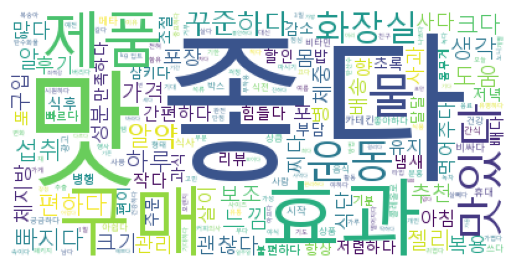

In [39]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off') 
plt.show()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


## 막대그래프 그리기 

### 유사어 대치 

In [41]:
df_replace_list = pd.read_csv('../datasets/replace_list.csv')
df_replace_list[:3]

,before_replacement,after_replacement
0,diet,다이어트
1,diet템,다이어트 제품
2,다욧트,다이어트


In [42]:
def replace_word(tokenized_review):
    replaced_review = str()
    for i in range(len(df_replace_list['before_replacement'])):
        try:
          # 치환할 단어가 있는 경우에만 데이터 치환 수행
          if df_replace_list['before_replacement'][i] in tokenized_review:
            tokenized_review = tokenized_review.replace(df_replace_list['before_replacement'][i], df_replace_list['after_replacement'][i])
        except Exception as e:
            print(f"Error 발생 / 에러명: {e}")
    return tokenized_review

In [43]:
## 확인용 
replace_word('어트 stess 살이 빠지다 피치 달달 단맛')

'어트 스트레스 체중 빼다 복숭아 달달하다 달달하다'

In [44]:
df_dropna['replaced_review'] = df_dropna['tokenized_review'].apply(replace_word)
df_dropna[:2]

C:\Users\02-19\AppData\Local\Temp\ipykernel_11132\365916842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['replaced_review'] = df_dropna['tokenized_review'].apply(replace_word)


,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating,rating,tokenized_review,replaced_review
0,0,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",보리오빠,없으면 안될 최고의 diet템! 피치번을 추천합니당 ㅎㅎ 사진엔 없지만 4통째 먹고...,2023.08.27,5점만점에 5점,5.0,최고 diet 템 피치 추천 사진 통째 찌다 필수 템 버리다 제품 광고 구매 효과 ...,최고 다이어트 제품 복숭아 추천 사진 통째 늘어나다 필수 제품 버리다 제품 광고 구...
1,1,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",바보바니,알약 통통이하트 넘예뻐요. 자기전 먹고 효과있으면 얼마나 좋을까요 ㅜㅜ 나이들수록 ...,2023.09.14,5점만점에 5점,5.0,알약 통통이 하트 예쁘다 효과 좋다 나이 빠지다 배 쌓이네 엉엉 딥트 종류셋트 묶이...,알약 통통이 좋다예쁘다 효과 좋다 나이 빼다 배 쌓이네 눈물 딥트 종류셋트 묶이다 ...


## 긍/부정 댓글 분리 

In [45]:
import re
df_dropna['rating'] = df_dropna['review_rating'].str.extract(r'(\s\d(?=점))|(\d.\d)').apply(lambda x: ''.join(x.dropna()), axis=1)
df_dropna[:2]

C:\Users\02-19\AppData\Local\Temp\ipykernel_11132\2451109038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['rating'] = df_dropna['review_rating'].str.extract(r'(\s\d(?=점))|(\d.\d)').apply(lambda x: ''.join(x.dropna()), axis=1)


,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating,rating,tokenized_review,replaced_review
0,0,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",보리오빠,없으면 안될 최고의 diet템! 피치번을 추천합니당 ㅎㅎ 사진엔 없지만 4통째 먹고...,2023.08.27,5점만점에 5점,5,최고 diet 템 피치 추천 사진 통째 찌다 필수 템 버리다 제품 광고 구매 효과 ...,최고 다이어트 제품 복숭아 추천 사진 통째 늘어나다 필수 제품 버리다 제품 광고 구...
1,1,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",바보바니,알약 통통이하트 넘예뻐요. 자기전 먹고 효과있으면 얼마나 좋을까요 ㅜㅜ 나이들수록 ...,2023.09.14,5점만점에 5점,5,알약 통통이 하트 예쁘다 효과 좋다 나이 빠지다 배 쌓이네 엉엉 딥트 종류셋트 묶이...,알약 통통이 좋다예쁘다 효과 좋다 나이 빼다 배 쌓이네 눈물 딥트 종류셋트 묶이다 ...


In [47]:
##  'rating' 열을 숫자로 변환
df_dropna['rating'] = pd.to_numeric(df_dropna['rating'])

C:\Users\02-19\AppData\Local\Temp\ipykernel_11132\2779142316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['rating'] = pd.to_numeric(df_dropna['rating'])


In [49]:
condition_positive =  df_dropna['rating'] >= 4 # 긍정
condition_negative = df_dropna['rating'] < 3  # 부정

In [50]:
df_review_positive = df_dropna[condition_positive]
df_review_negative= df_dropna[condition_negative]

In [51]:
df_review_positive[:2]

,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating,rating,tokenized_review,replaced_review
0,0,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",보리오빠,없으면 안될 최고의 diet템! 피치번을 추천합니당 ㅎㅎ 사진엔 없지만 4통째 먹고...,2023.08.27,5점만점에 5점,5.0,최고 diet 템 피치 추천 사진 통째 찌다 필수 템 버리다 제품 광고 구매 효과 ...,최고 다이어트 제품 복숭아 추천 사진 통째 늘어나다 필수 제품 버리다 제품 광고 구...
1,1,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",바보바니,알약 통통이하트 넘예뻐요. 자기전 먹고 효과있으면 얼마나 좋을까요 ㅜㅜ 나이들수록 ...,2023.09.14,5점만점에 5점,5.0,알약 통통이 하트 예쁘다 효과 좋다 나이 빠지다 배 쌓이네 엉엉 딥트 종류셋트 묶이...,알약 통통이 좋다예쁘다 효과 좋다 나이 빼다 배 쌓이네 눈물 딥트 종류셋트 묶이다 ...


In [52]:
df_review_negative[:2]

,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating,rating,tokenized_review,replaced_review
48,48,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",byeol****,솔직히 효과 1도 없는 것 같아요! 알약으로 살뺄 수 있다는게 말이 안되는데 혹해서...,2023.09.16,5점만점에 1점,1.0,효과 알약 살빼다 버리다 돈 아깝다,효과 알약 살빼다 버리다 돈 아깝다
58,58,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",러블리윤,음.. 저는 일주일정도 복용하다가 중단이에요\n\n민감한 피부를 가지고 있어서 그런...,2023.08.06,5점만점에 2점,2.0,일주일 복용 중단 민감하다 피부 2일 지나다 얼굴 트러블 올라오다 시작 단순하다 점...,일주일 복용 중단 민감하다 피부 2일 지나다 얼굴 트러블 올라오다 시작 단순하다 점...


# LDA 분석

In [23]:
from gensim.corpora import Dictionary

In [53]:
dictionary = Dictionary(df_review_negative[['replaced_review']].values)
dictionary

In [54]:
dictionary.doc2bow(df_review_negative[['replaced_review']].values[3])

[(3, 1)]

In [55]:
# dictionary에 의한 한글 문장을 벡터화 변환
corpus_list = list()
for sentence in df_review_negative[['replaced_review']].values :
    vectors = dictionary.doc2bow(sentence)
    corpus_list.append(vectors)

In [56]:
df_review_negative['Vectorization'] = corpus_list
df_review_negative[:3]

C:\Users\02-19\AppData\Local\Temp\ipykernel_11132\350940733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review_negative['Vectorization'] = corpus_list


,Unnamed: 0,product_name,review_name,review_content,review_date,review_rating,rating,tokenized_review,replaced_review,Vectorization
48,48,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",byeol****,솔직히 효과 1도 없는 것 같아요! 알약으로 살뺄 수 있다는게 말이 안되는데 혹해서...,2023.09.16,5점만점에 1점,1.0,효과 알약 살빼다 버리다 돈 아깝다,효과 알약 살빼다 버리다 돈 아깝다,"[(0, 1)]"
58,58,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",러블리윤,음.. 저는 일주일정도 복용하다가 중단이에요\n\n민감한 피부를 가지고 있어서 그런...,2023.08.06,5점만점에 2점,2.0,일주일 복용 중단 민감하다 피부 2일 지나다 얼굴 트러블 올라오다 시작 단순하다 점...,일주일 복용 중단 민감하다 피부 2일 지나다 얼굴 트러블 올라오다 시작 단순하다 점...,"[(1, 1)]"
59,59,"[주현영, 이나연 찐템]딥트 3일 피치(맛)번 30정 (30일분)",여름뮤트겨울브라이트,이거 먹고 자면 코가 막히고 목이 부어요....먹고 자고 나서 계속 아파서 먹을 수...,2023.08.31,5점만점에 1점,1.0,막히다 자고 아프다,막히다 자고 아프다,"[(2, 1)]"


## 토픽 잡기 

In [57]:
from gensim.models import LdaModel

In [58]:
lda_model = LdaModel(corpus=corpus_list, id2word=dictionary, num_topics=3)

In [59]:
lda_model.print_topics(num_words=4)

[(0,
  '0.099*"가격 비싸다 싸다 제발" + 0.028*"소화도 커피 물 타도 탄산수 타도 알코올 냄새 심하다 진하다 희다 휘발 냄새 맛있다 건가" + 0.017*"173 cm 53 kg 하루 화장실 신호 전혀 173 54 kg 갈증 심하다 운동 조절 낫다" + 0.017*"포장 만점 효과 전혀 광고 제품 후기알바 진정 크리 처방"'),
 (1,
  '0.017*"국산 금은화 분말 검색 구입 제품 중국산 검색 교묘하다 상세 검색 중국산 표기 가격 비교 최저 배 가깝다 가격 국산 이르다 비싸다 생각 구입 반품 생각 13000원 잃어버리다 치기 교묘하다 불쾌하다 아깝다 내 너스 하장 버리다 겠다" + 0.017*"맛있다 사람 모금 룸메 보라 아깝다 오만상 쓰다 화장실 싫어하다 사람 선물 용이 화장실 감금 싸다 가능 무섭다 수박" + 0.017*"살빼다 구매 맛 맛없다 알약 낳을 신체 500 드니 속이다 안좋다 향 가루 느낌 달다 쓰다 시지 애매 맛 맛없다 비추다 부차 맛있다 겠다" + 0.017*"화장실 도움 겠다 매다"'),
 (2,
  '0.019*"취향 향 맛 당황 며칠 참고 적응 건지다 꾸준하다 킬로 빼다" + 0.017*"빼다 달라지다 시작 주정 트러블 생기다 시작 생리 불순 생기다 휴가 다녀오다 시작 생리 돌아오다 트러블 진정 의심 시작 아깝다 남다 일주일 트러블 올라오다 시작 생리 조심하다" + 0.017*"부차 브랜드 구매 맛 저렴하다 이유 기존 브랜드 대형 마트 구매 돈 아깝다" + 0.017*"박스 빈자리 종이 끼우다 박스 작다 만들다 결론 개인 효과 딥트 복숭아 알약 딱하다 효과 가격 비싸다 도안 16시간 헐다 단식 나름 식단 돈 버리다"')]

## 토픽 분석 

### LDA 시각화 

In [ ]:
#%pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [ ]:
result_visualized = pyLDAvis.gensim_models.prepare(lda_model, corpus_list, dictionary)
pyLDAvis.display(result_visualized)

In [ ]:
pyLDAvis.save_html(result_visualized, './result_visualized_negative.html')

## LDA 토픽 모델링 

#### 하이퍼파라미터 튜닝

In [60]:
NUM_TOPICS = 10 # 토픽 개수는 하이퍼파라미터
# passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정
PASSES = 15

### 모델 학습 함수 

In [61]:
from gensim import corpora # 단어 빈도수 계산 패키지
import gensim # LDA 모델 활용 목적
import pyLDAvis.gensim_models # LDA 시각화용 패키지

In [62]:
dictionary = corpora.Dictionary(df_dropna['replaced_review'].apply(lambda x: x.split()).values)
corpus = [dictionary.doc2bow(review.split()) for review in df_dropna['replaced_review'].values]
# LDA 모델 학습
model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics=NUM_TOPICS, 
                                            id2word=dictionary, 
                                            passes=PASSES)

In [63]:
def lda_modeling(review_prep):
    # 단어 인코딩 및 빈도수 계산
    dictionary = corpora.Dictionary(df_dropna['replaced_review'].apply(lambda x: x.split()).values)
    corpus = [dictionary.doc2bow(review.split()) for review in df_dropna['replaced_review'].values]
    # LDA 모델 학습
    model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics=NUM_TOPICS, 
                                            id2word=dictionary, 
                                            passes=PASSES)
    return model, corpus, dictionary

### 토픽별 단어 구성 출력 함수 

In [64]:
def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    #topic_prop.to_excel('./result/topic_prop_' + RATING +  '.xlsx')
    display(topic_prop)

### 시각화 함수 

In [65]:
def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)
    # 시각화 결과 저장
    # RESULT_FILE = './result/lda_result_' + RATING + '.html'
    # pyLDAvis.save_html(result_visualized, RESULT_FILE)

### 긍정정 리뷰 토픽 모델링 

In [66]:
model, corpus, dictionary = lda_modeling(df_review_positive)
NUM_WORDS = 10

In [67]:
from gensim import corpora 

In [68]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

,topic_num,word_prop
0,1,"0.029*""제품"" + 0.016*""좋다"" + 0.015*""구매"" + 0.013*""..."
1,2,"0.053*""맛"" + 0.025*""좋다"" + 0.017*""느낌"" + 0.012*""사..."
2,3,"0.043*""물"" + 0.034*""구매"" + 0.028*""맛"" + 0.025*""좋다..."
3,4,"0.103*""좋다"" + 0.072*""구매"" + 0.055*""배송"" + 0.046*""..."
4,5,"0.051*""효과"" + 0.041*""좋다"" + 0.036*""운동"" + 0.025*""..."
5,6,"0.032*""구매"" + 0.020*""제품"" + 0.020*""섭취"" + 0.016*""..."
6,7,"0.027*""포장"" + 0.024*""제품"" + 0.016*""포스"" + 0.016*""..."
7,8,"0.067*""맛"" + 0.056*""좋다"" + 0.039*""맛있다"" + 0.025*""..."
8,9,"0.036*""제품"" + 0.028*""좋다"" + 0.026*""색상"" + 0.020*""..."
9,10,"0.036*""빼다"" + 0.023*""조절"" + 0.019*""체중"" + 0.019*""..."


In [69]:
# lda_visualize(model, corpus, dictionary, RATING)

### 부정적 리뷰 토픽 모델링

In [70]:
model, corpus, dictionary = lda_modeling(df_review_negative)
NUM_WORDS = 10

In [71]:
RATING = 'neg'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

,topic_num,word_prop
0,1,"0.113*""좋다"" + 0.043*""배송"" + 0.031*""빠르다"" + 0.031*..."
1,2,"0.050*""구매"" + 0.035*""제품"" + 0.023*""좋다"" + 0.022*""..."
2,3,"0.028*""빼다"" + 0.024*""운동"" + 0.021*""도움"" + 0.019*""..."
3,4,"0.017*""구매"" + 0.016*""효과"" + 0.013*""알약"" + 0.012*""..."
4,5,"0.043*""좋다"" + 0.033*""제품"" + 0.025*""구매"" + 0.025*""..."
5,6,"0.116*""맛"" + 0.069*""맛있다"" + 0.047*""좋다"" + 0.044*""..."
6,7,"0.050*""주문"" + 0.015*""항상"" + 0.015*""콜레"" + 0.014*""..."
7,8,"0.043*""물"" + 0.036*""맛"" + 0.016*""섭취"" + 0.014*""좋다..."
8,9,"0.038*""좋다"" + 0.035*""효과"" + 0.030*""제품"" + 0.028*""..."
9,10,"0.101*""효과"" + 0.044*""좋다"" + 0.043*""구매"" + 0.016*""..."


In [72]:
lda_visualize(model, corpus, dictionary, RATING)

In [73]:
df_dropna['replaced_review']

0       최고 다이어트 제품 복숭아 추천 사진 통째 늘어나다 필수 제품 버리다 제품 광고 구...
1       알약 통통이 좋다예쁘다 효과 좋다 나이 빼다 배 쌓이네 눈물 딥트 종류셋트 묶이다 ...
2                 드라마틱하다 달라지다 죄책감 덜다 의미 운동 식단 병행 변화 체중 생각
3       달달하다 사탕 맛 2-3초 달달하다 구리다 녹다 맛없다 본체 삼키다 길쭉하다 알약 ...
4                                    효과 늘어나다 알약 이쁘다 입안 좋다
                              ...                        
4583                                     친정엄마 구매 산양 좋다 기회
4584                               산양 단백질 광고 구매 달다 편하다 좋다
4585                            꾸준하다 먹고다 좋아지다 건지다 맛있다 먹고다
4586                                           적다 제품 찢어지다
4587                                           가격 배송 만족하다
Name: replaced_review, Length: 3813, dtype: object

In [74]:
df_dropna['replaced_review_2'] = df_dropna['replaced_review'].apply(lambda x: [x])

C:\Users\02-19\AppData\Local\Temp\ipykernel_11132\2495281046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['replaced_review_2'] = df_dropna['replaced_review'].apply(lambda x: [x])


In [75]:
replaced_review_2 = df_dropna['replaced_review_2']

In [76]:
from gensim import corpora
dictionary = corpora.Dictionary(replaced_review_2)
corpus = [dictionary.doc2bow(text) for text in replaced_review_2]

In [77]:
dictionary = corpora.Dictionary(df_dropna['replaced_review'].apply(lambda x: x.split()).values)
corpus = [dictionary.doc2bow(review.split()) for review in df_dropna['replaced_review'].values]
# LDA 모델 학습
model = gensim.models.ldamodel.LdaModel(corpus, 
                                            num_topics=NUM_TOPICS, 
                                            id2word=dictionary, 
                                            passes=PASSES)


In [78]:
dictionary[25]

'은은하다'

In [79]:
corpus[1]

[(5, 1),
 (8, 1),
 (14, 1),
 (23, 1),
 (29, 1),
 (38, 2),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 1),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 1),
 (47, 1),
 (48, 1)]

In [80]:
len(dictionary)

5935

In [81]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.032*"제품" + 0.016*"물" + 0.016*"유통" + 0.016*"기한"')
(1, '0.095*"좋다" + 0.068*"배송" + 0.052*"빠르다" + 0.022*"제품"')
(2, '0.088*"구매" + 0.045*"저렴하다" + 0.034*"좋다" + 0.030*"주문"')
(3, '0.075*"맛" + 0.052*"좋다" + 0.048*"맛있다" + 0.032*"젤리"')
(4, '0.057*"맛" + 0.040*"물" + 0.021*"구매" + 0.018*"맛있다"')
(5, '0.024*"제품" + 0.022*"구매" + 0.020*"좋다" + 0.019*"효과"')
(6, '0.049*"좋다" + 0.046*"제품" + 0.033*"구매" + 0.023*"효과"')
(7, '0.102*"효과" + 0.045*"좋다" + 0.033*"운동" + 0.026*"꾸준하다"')
(8, '0.025*"편하다" + 0.020*"알약" + 0.010*"나이트" + 0.010*"크기"')
(9, '0.063*"좋다" + 0.023*"구매" + 0.015*"구입" + 0.014*"편하다"')


In [82]:
## 긍정/부정 토픽 확인 
# NUM_TOPICS = 10 # 토픽 개수는 하이퍼파라미터
# # passes: 딥러닝에서 Epoch와 같은 개념으로, 전체 corpus로 모델 학습 횟수 결정
# PASSES = 15

In [83]:
# def lda_modeling(reviews):
#     # 단어 인코딩 및 빈도수 계산
#     dictionary = corpora.Dictionary(reviews)
#     corpus = [dictionary.doc2bow(review.split()) for review in df['preprocess_review'].values]
#     # LDA 모델 학습
#     model = gensim.models.ldamodel.LdaModel(corpus, 
#                                             num_topics=NUM_TOPICS, 
#                                             id2word=dictionary, 
#                                             passes=PASSES)
#     return model, corpus, dictionary

In [84]:
# def print_topic_prop(topics, RATING):
#     topic_values = []
#     for topic in topics:
#         topic_value = topic[1]
#         topic_values.append(topic_value)
#     topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
#     #topic_prop.to_excel('./result/topic_prop_' + RATING +  '.xlsx')
#     display(topic_prop)

In [85]:
# model, corpus, dictionary = lda_modeling(negative_review) #부정
# NUM_WORDS = 10

In [86]:
# sentiment = '부정'
# topics = model.print_topics(num_words = NUM_WORDS)
# print_topic_prop(topics, RATING)

In [87]:
# sentiment = '긍정'
# topics = model.print_topics(num_words = NUM_WORDS)
# print_topic_prop(topics, RATING)